In [ ]:
#1. plot exact function for m1 and m2

"""
The solution is described in AppendixA in paper of Marco.
what I need to do is to implement the equation;
If I want to get the plot like figure4.a, I actually need to get the solution of d2(t) = ... equation.

equation9 --> appendixA
where d1t is the exact solution for m1
      d2t is the exact solution for m2
      
      So, here the goal is to get (x,d2t(t))曲线 
"""

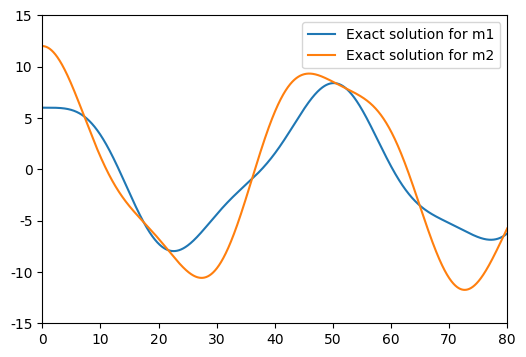

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import fractions
import math

plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False
 
#生成模拟数据 for x, like simulation the step = 0.01, range is[0,80]
x = np.arange(0,80.0,0.01)

#initial value for m1 and m2
m1 = 6
m2 = 3
k1 = fractions.Fraction(1,6)
k2 = fractions.Fraction(1,6)
d1_0 = 6
d2_0 = 12
v1_0 = 0
v2_0 = 0

#calculate a,w1,w2,g1_0,g2_0 for d2t
x1 = k1*m1 
x2 = (k1*k1)*m1*m2
x3 = k1*m2 
x4 = k1*k2*m1*m2
x5 = k1*k2*m2*m2
x6 = k2*k2*m1*m2
x7 = k2*m2

a = math.sqrt(x1*x1 - 2*x2 + x3*x3 - 2*x4 + 2*x5 + 4*x6 + x7*x7) # check

x8 = k1*m1+k1*m2+k2*m2

w1 = math.sqrt((x8-a)/(2*m1*m2)) # 
w2 = math.sqrt((x8+a)/(2*m1*m2)) #

x9 = d1_0 * a
x10 = d1_0 *  (x1 - x3 -x7)
x11 = 2*d2_0 * x7
x12 = math.pow((x1-x3-x7+a),2)
x13 = math.pow((-x1+x3+x7+a),2)

x14 = 4*k2*k2*m1

x15 = math.sqrt(m2 + x12/x14)
x16 = math.sqrt(m2 + x13/x14)

g1_0 = (x9 + x10 +x11)/(2*k2*x15) #
g2_0 = (-x9 + x10+x11)/(2*k2*x16) #

x17 = x1 - x3 -x7

x1_1 = (x17 + a)/(2*k2*m1*x15)
x1_2 = (x17 - a)/(2*k2*m1*x16)

x2_1 = 1/x15
x2_2 = 1/x16
"""
print(x1_1)
print(x1_2)
print(x2_1)
print(x2_2)
print((18+9*math.sqrt(2))/math.sqrt(18))
print()
print(1/math.sqrt(6))

print('a = %.6f' % a)
print(math.sqrt(2))

print('w1= %.6f' % w1)
print(math.sqrt((2-math.sqrt(2))/36))
print('w2= %.6f' % w2)
print(math.sqrt((2+math.sqrt(2))/36))

print('g1_0= %.9f' % g1_0)
print((36 + 18*math.sqrt(2))/math.sqrt(6))
"""

d1t = x1_1*g1_0*np.cos(w1*x) + x1_2*g2_0*np.cos(w2*x)
d2t = x2_1*g1_0*np.cos(w1*x) + x2_2*(g2_0*np.cos(w2*x))
#创建图形，切分绘图区域，绘制两条曲线
plt.figure(num='Exact solution')
plt.xlim(0,80)
plt.ylim(-15,15)
plt.plot(x,d1t,label="Exact solution for m1")
plt.plot(x,d2t,label="Exact solution for m2")


 
#设置并显示图例，使用bbox_to_anchor参数使用
plt.legend()

In [ ]:

# 2. combine three csv files and plot

## 2.1 combine two csv files first;

In [97]:

'''
This program reads two csv files and merges them based on a common key column.
'''
# import the pandas library
# you can install using the following command: pip install pandas

import pandas as pd

# Read the files into two dataframes.
df1 = pd.read_csv('Gaus_WR_plot_res.csv')
df2 = pd.read_csv('Jacobi_WR_plot_res.csv')
#df3 = pd.read_csv('U_aN_plot_res.csv')

#df = pd.concat([df1, df2])
#df.to_csv('combined.csv')
# Merge the two dataframes, using dt column as key
df3 = pd.merge(df1, df2,on = 'dt')
df3.set_index('dt', inplace = True)

# Write it to a new CSV file
df3.to_csv('combined_g_j_dispalcement.csv')


In [ ]:
## 2.2 combine the above combines file1 and the newmark csv file
import pandas as pd

df0 = pd.read_csv('combined_g_j_dispalcement.csv')
df = pd.read_csv('U_dN_plot_res.csv')

df_c = pd.merge(df0,df, on = 'dt')
df_c.set_index('dt', inplace = True)

df_c.to_csv('combined_gjn_displacement.csv')


In [ ]:
##2.3 plot with above final combined csv file :combined_gjn_displacement.csv
import csv
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
 
data = pd.read_csv('combined_gjn_displacement.csv')
 
xdata = []
y1data = []
y2data = []
y3data = []
xdata = data.loc[:, 'dt']
#xdata=0:0.3:80;
 
ydata = data.loc[:, 'WR_x']
y2data = data.loc[:, 'WR_y']
y3data = data.loc[:,'U_dN']

print(xdata)
print(ydata)#解决画多幅图时出现图形部分重叠

plt.plot(xdata, ydata, c='magenta',ls ='--', lw = 1.4, label=u'Gauss Seidel WR')
plt.plot(xdata, y2data, marker='x',markevery=0.03, markersize=4.5,c='blue',ls='-',lw=0.4,label="Jacobi WR")
plt.plot(xdata, y3data, marker='o',markevery=0.04,markersize=4.0,lw=0.4, c='lime',label="Newmark")
plt.plot(x, d2t,ls ='-',color = 'red',lw = 0.8,label="Exact analytical solution for m2")

#plt.plot(x,y1,ls='--',lw=4,c='b',alpha=0.5,label='totm
plt.xlim(0,80)
plt.ylim(-15,15)

plt.title('Comparison of displacement', size=12)

plt.legend(loc=1, prop = {'size':6})
plt.xlabel(u'time[s]', size=10)
plt.ylabel(u'horizontal displacement[l/s]', size=10)
 
plt.show()